In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('./results/**/summary.csv', recursive = True)
files

['./results\\mimic2\\summary.csv',
 './results\\mimic_explain_classifier\\summary.csv',
 './results\\vdem_low2mid\\summary.csv']

In [3]:
file = files[0]

In [4]:
df = pd.read_csv(file, index_col=0)
df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
df['Error (%)'] = 100 - df['explanation_accuracy_mean']
df['Complexity'] = df['explanation_complexity_mean']
df['OOB'] = [0, 0, 0, 1, 1]
df

,model_accuracy_mean,explanation_accuracy_mean,explanation_fidelity_mean,explanation_complexity_mean,elapsed_time_mean,explanation_consistency_mean,model_accuracy_sem,explanation_accuracy_sem,explanation_fidelity_sem,explanation_complexity_sem,elapsed_time_sem,explanation_consistency_sem,Error (%),Complexity,OOB
pruning,86.598743,85.079667,0.96228,5.1,13.319946,0.510000,0.003019,0.004809,0.008124,0.348010,0.303130,0.000000e+00,14.920333,5.1,0
weights,85.361518,82.094204,0.87836,23.4,266.215391,0.260000,0.007811,0.013768,0.021187,11.200397,166.899079,1.850372e-17,17.905796,23.4,0
psi,84.009078,82.826128,0.84628,2.6,8.813209,0.371429,0.000894,0.006595,0.006734,0.163299,0.148552,0.000000e+00,17.173872,2.6,0
tree,79.557545,79.557545,1.00000,1342.6,0.016373,0.815033,0.007968,0.007968,0.000000,16.940550,0.000643,3.700743e-17,20.442455,1342.6,1
BRL,0.861499,85.923951,1.00000,20.7,495.594809,0.283333,0.005085,0.004582,0.000000,4.077172,7.128592,1.850372e-17,14.076049,20.7,1


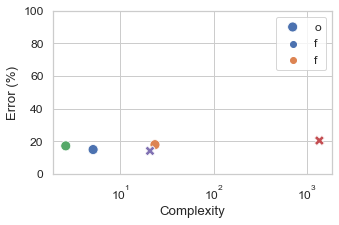

In [5]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
plt.figure(figsize=[5, 3])
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=100)
plt.xscale('log')
plt.ylim([0, 100])
plt.legend('off')
plt.show()

In [6]:
file.split('\\')[1]

'mimic2'

./results\mimic2\summary.csv


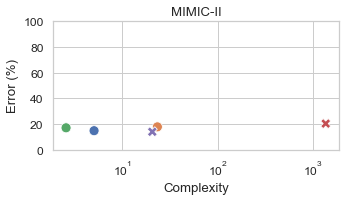

./results\mimic_explain_classifier\summary.csv


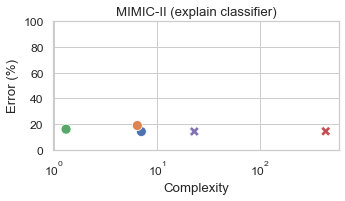

./results\vdem_low2mid\summary.csv


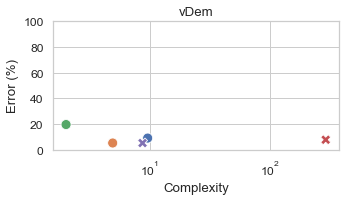

In [7]:
titles = ['MIMIC-II', 'MIMIC-II (explain classifier)', 'vDem']
for i, (file, title) in enumerate(zip(files, titles)):
    df = pd.read_csv(file, index_col=0)
    
    if file == './results\\vdem_low2mid\\summary.csv':
        df.rename(columns = {'model_accuracy_top_mean': 'model_accuracy_mean'}, inplace = True) 
        df.rename(columns = {'model_accuracy_top_sem': 'model_accuracy_sem'}, inplace = True) 
    print(file)
    df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
    df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
    df['Error (%)'] = 100 - df['explanation_accuracy_mean']
    df['Complexity'] = df['explanation_complexity_mean']
    df['OOB'] = [0, 0, 0, 1, 1]
    
    plt.figure(figsize=[5, 3])
    plt.title(title)
    sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=100, legend=False)
    plt.xscale('log')
    plt.ylim([0, 100])
    plt.tight_layout()
    name = file.split('\\')[1]
    plt.savefig(f"./results/{name}.png")
    plt.savefig(f"./results/{name}.pdf")
    plt.show()
    

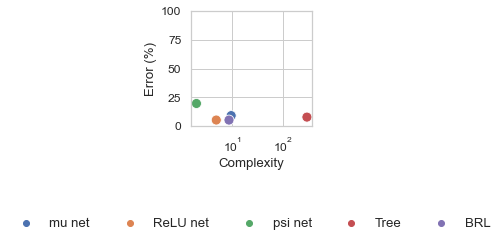

In [9]:
import matplotlib as mpl
df['Method'] = ['mu net', 'ReLU net', 'psi net', 'Tree', 'BRL']
plt.figure(figsize=[5, 8])
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue='Method', s=100)
plt.xscale('log')
plt.ylim([0, 100])
plt.legend(loc='lower center', fontsize='medium', ncol=5, frameon=False, 
           bbox_to_anchor=(0.5, -1),fancybox=False, shadow=False)
plt.tight_layout()
plt.savefig('./results/legend.png', bbox_inches=mpl.transforms.Bbox([[-0.8, 4.7], [5.9, 4.9]]))
plt.savefig('./results/legend.pdf', bbox_inches=mpl.transforms.Bbox([[-0.8, 4.7], [5.9, 4.9]]))
plt.show()